# Clustering

## Importing Needed packages

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import scipy.cluster.hierarchy

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster import hierarchy 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN

%matplotlib inline

## Load Data From CSV File

In [135]:
df = pd.read_csv("Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Exploration

In [136]:
# summarize the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data pre-processing

In [137]:
gender = {"Gender":{'Female': 1,'Male': 0}}
df.replace(gender , inplace = True)

df = df[df['Annual Income (k$)'] <= 120].reset_index(drop=True)

df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,196.00000,196.000000,196.000000,196.000000,196.000000
mean,98.50000,0.566327,38.933673,59.112245,50.188776
std,56.72448,0.496850,14.073094,24.454618,25.773373
min,1.00000,0.000000,18.000000,15.000000,1.000000
25%,49.75000,0.000000,28.000000,40.000000,35.000000
50%,98.50000,1.000000,36.000000,60.500000,50.000000
75%,147.25000,1.000000,49.000000,77.000000,72.250000
max,196.00000,1.000000,70.000000,120.000000,99.000000


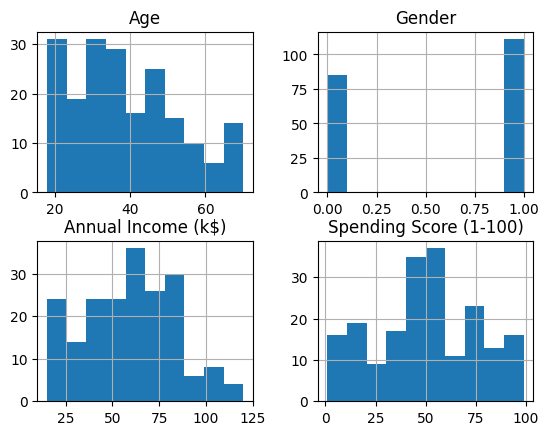

In [138]:
cdf = df[['Age','Gender','Annual Income (k$)','Spending Score (1-100)']]
viz = cdf
viz.hist()
plt.show()

Now, let's plot each of these features against the Annual Income (k$), to see how linear their relationship is:

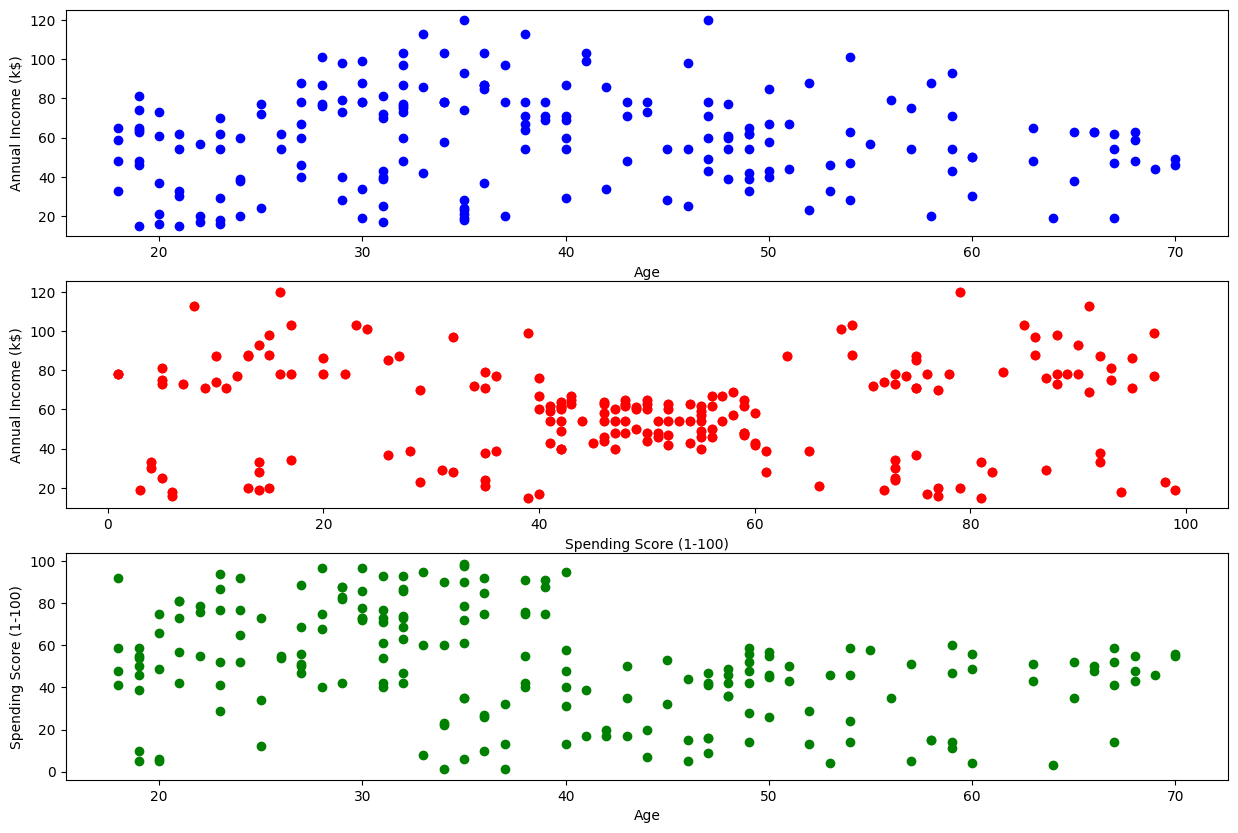

In [139]:
fig, axs = plt.subplots(3,1,figsize=(15,10), sharey='row')
ax1,ax2, ax3 = axs

ax1.scatter(cdf.Age, cdf['Annual Income (k$)'],  color='blue')
ax1.set_xlabel("Age")
ax1.set_ylabel("Annual Income (k$)")

ax2.scatter(cdf['Spending Score (1-100)'], cdf['Annual Income (k$)'],  color='red')
ax2.set_xlabel("Spending Score (1-100)")
ax2.set_ylabel("Annual Income (k$)")

ax2.scatter(cdf['Spending Score (1-100)'], cdf['Annual Income (k$)'],  color='red')
ax2.set_xlabel("Spending Score (1-100)")
ax2.set_ylabel("Annual Income (k$)")

ax3.scatter(cdf.Age, cdf['Spending Score (1-100)'],  color='green')
ax3.set_xlabel("Age")
ax3.set_ylabel("Spending Score (1-100)")

plt.show()


## Customer Segmentation with K-Means

### Normalizing over the standard deviation

In [140]:
X = df.values
X = np.nan_to_num(X)
normal_dataSet = StandardScaler().fit_transform(X)
normal_dataSet

array([[-1.72323624, -1.1427521 , -1.42006579, -1.80846038, -0.43523322],
       [-1.70556202, -1.1427521 , -1.27758671, -1.80846038,  1.19852868],
       [-1.68788781,  0.87508043, -1.34882625, -1.76746359, -1.71890329],
       [-1.67021359,  0.87508043, -1.13510762, -1.76746359,  1.04293231],
       [-1.65253937,  0.87508043, -0.56519127, -1.7264668 , -0.39633413],
       [-1.63486515,  0.87508043, -1.20634716, -1.7264668 ,  1.00403322],
       [-1.61719094,  0.87508043, -0.2802331 , -1.68547002, -1.71890329],
       [-1.59951672,  0.87508043, -1.13510762, -1.68547002,  1.70421689],
       [-1.5818425 , -1.1427521 ,  1.78571365, -1.64447323, -1.83560056],
       [-1.56416828,  0.87508043, -0.63643082, -1.64447323,  0.84843685],
       [-1.54649406, -1.1427521 ,  1.99943228, -1.64447323, -1.40771054],
       [-1.52881985,  0.87508043, -0.2802331 , -1.64447323,  1.89871236],
       [-1.51114563,  0.87508043,  1.35827639, -1.60347644, -1.36881145],
       [-1.49347141,  0.87508043, -1.0

## Modeling

In [141]:
SSE = []
k_means_data = []
for cluster in range(3,10):
    X = normal_dataSet
    k_means = KMeans(init = "k-means++", n_clusters = cluster, n_init = 12)
    k_means.fit(X)
    SSE.append(k_means.inertia_)
    k_means_data.append(k_means)

Text(0, 0.5, 'Inertia')

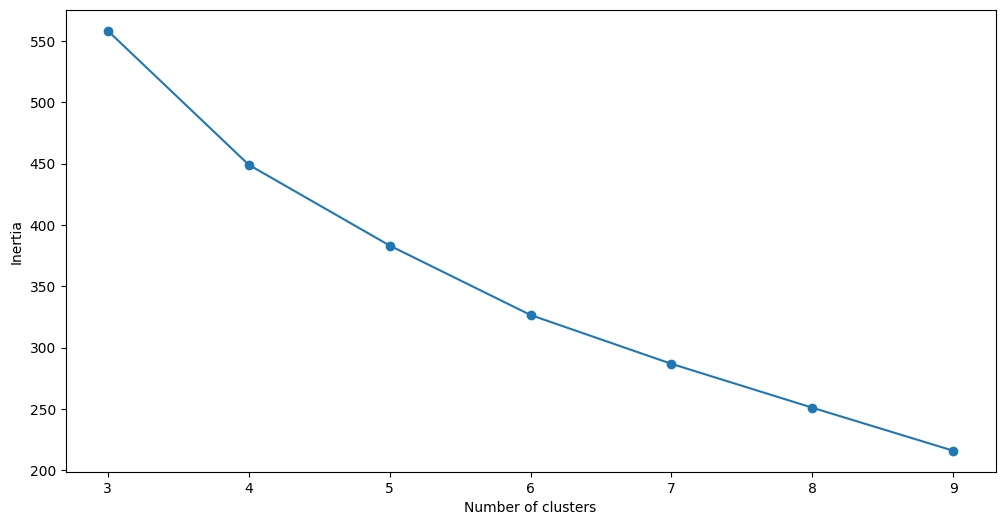

In [142]:
frame = pd.DataFrame({'Cluster':range(3,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

## Insights

In [143]:
labels = k_means_data[1].labels_
df["Clus_km"] = labels
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,1
3,4,1,23,16,77,1
4,5,1,31,17,40,1


In [144]:
df.groupby('Clus_km').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,,
0,158.051282,0.564103,32.820513,83.282051,81.025641
1,50.250000,0.616667,26.183333,38.616667,57.616667
2,70.033898,0.559322,55.016949,48.254237,41.966102
3,157.763158,0.500000,40.368421,83.526316,19.578947


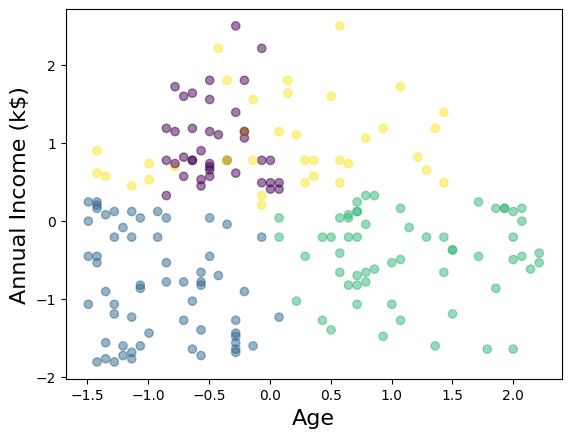

In [145]:
plt.scatter(X[:, 2], X[:, 3], c = labels, alpha = 0.5)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Annual Income (k$)', fontsize = 16)
plt.show()

# Customer Segmentation with Hierarchical

In [146]:
feature_mtx = normal_dataSet
feature_mtx [0:5]

array([[-1.72323624, -1.1427521 , -1.42006579, -1.80846038, -0.43523322],
       [-1.70556202, -1.1427521 , -1.27758671, -1.80846038,  1.19852868],
       [-1.68788781,  0.87508043, -1.34882625, -1.76746359, -1.71890329],
       [-1.67021359,  0.87508043, -1.13510762, -1.76746359,  1.04293231],
       [-1.65253937,  0.87508043, -0.56519127, -1.7264668 , -0.39633413]])

In [147]:
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         1.64005812 2.39321171 ... 6.14596133 6.25601592 6.18062976]
 [1.64005812 0.         3.5482567  ... 5.77468223 6.63786867 5.94635976]
 [2.39321171 3.5482567  0.         ... 6.30766742 5.79183835 6.2466012 ]
 ...
 [6.14596133 5.77468223 6.30766742 ... 0.         3.00085965 0.58921417]
 [6.25601592 6.63786867 5.79183835 ... 3.00085965 0.         2.59552947]
 [6.18062976 5.94635976 6.2466012  ... 0.58921417 2.59552947 0.        ]]


In [148]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\Behrooz\AppData\Local\Temp\ipykernel_9220\1633147189.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


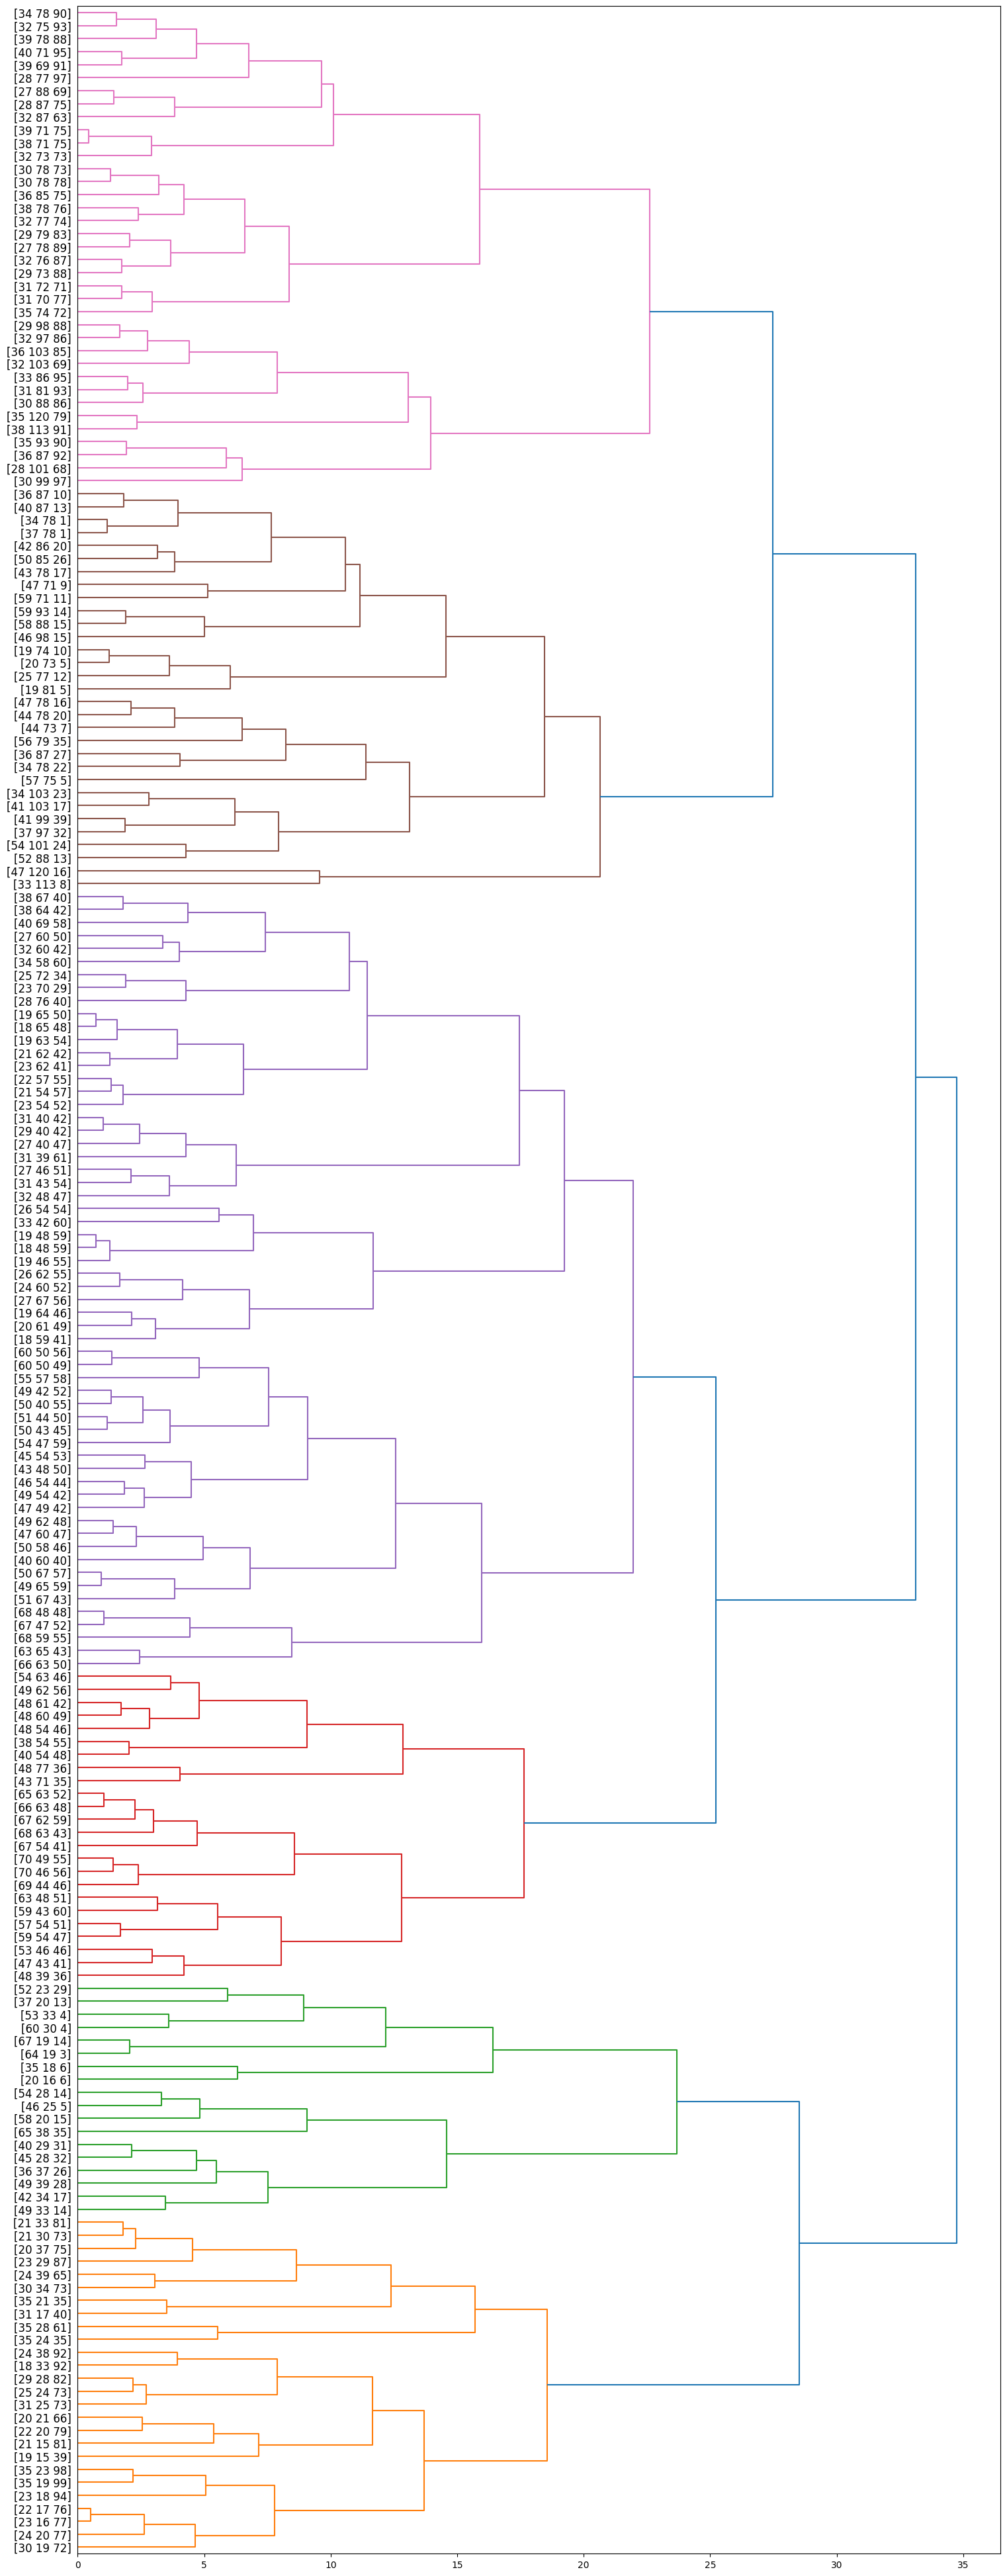

In [149]:
fig = pl.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Age'][id], df['Annual Income (k$)'][id], df['Spending Score (1-100)'][id])
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func = llf, leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

In [150]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'ward', metric = 'euclidean')
agglom = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=100)
agglom.fit(dist_matrix)
agglom.labels_

C:\Users\Behrooz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Behrooz\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [151]:
df['cluster_agglom'] = agglom.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km,cluster_agglom
0,1,0,19,15,39,1,2
1,2,0,21,15,81,1,2
2,3,1,20,16,6,1,2
3,4,1,23,16,77,1,2
4,5,1,31,17,40,1,2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Spending Score (1-100)')

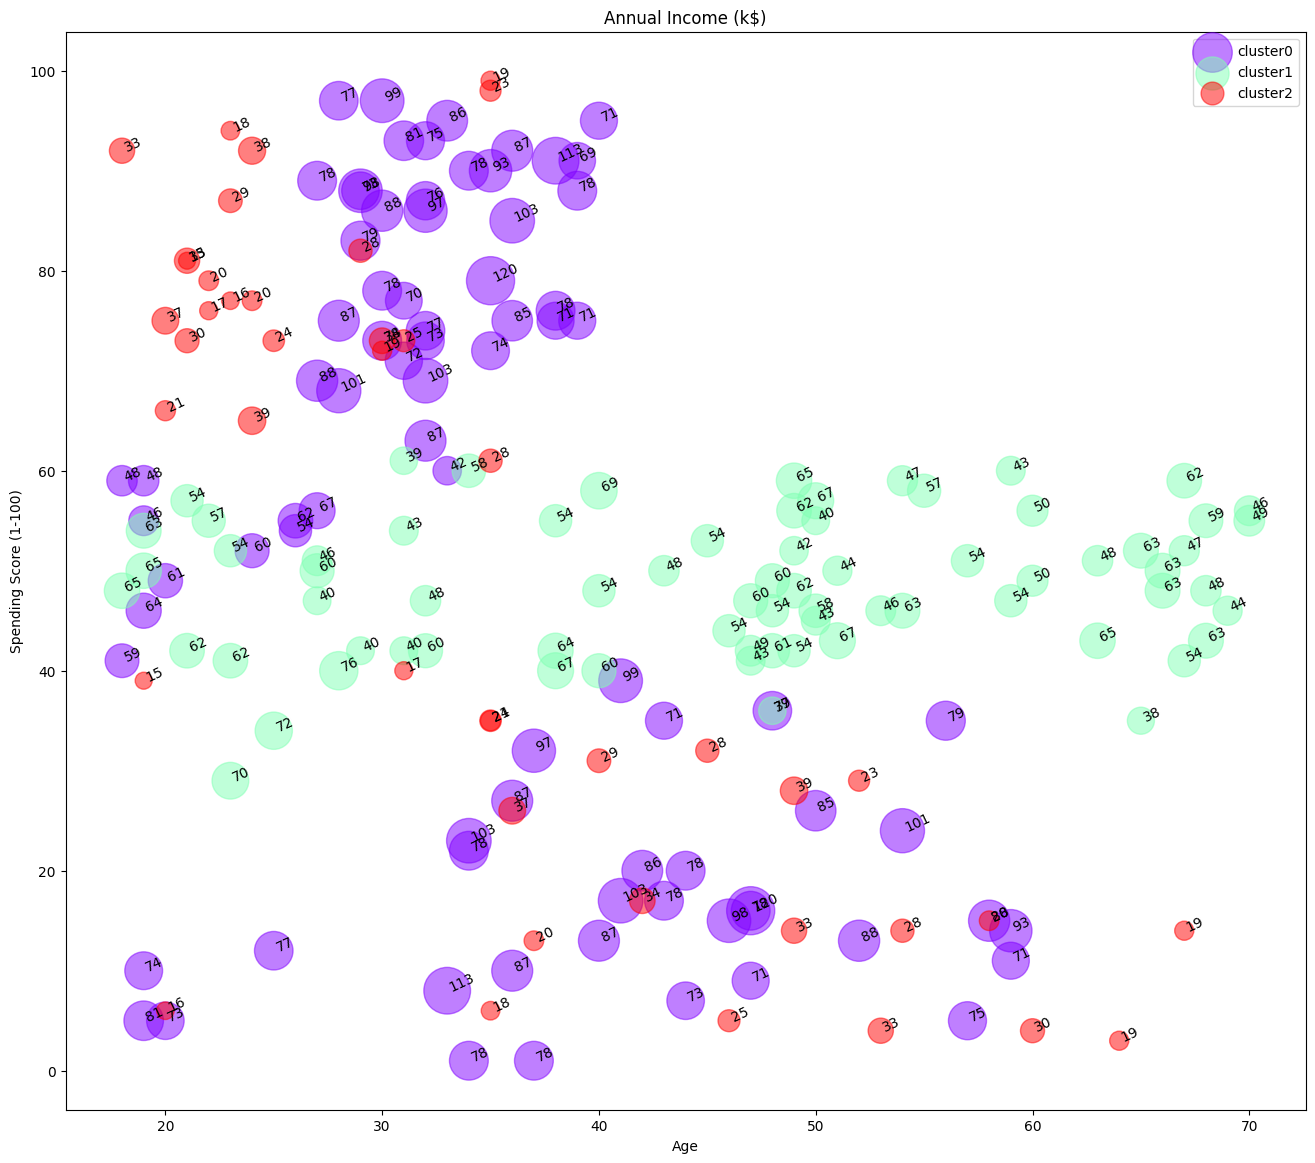

In [152]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))
plt.figure(figsize=(16,14))
for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_agglom == label]
    for i in subset.index:
            plt.text(subset.Age[i], subset['Spending Score (1-100)'][i],subset['Annual Income (k$)'][i], rotation=25) 
    plt.scatter(subset.Age, subset['Spending Score (1-100)'], s= subset['Annual Income (k$)']*10, c=color, label='cluster'+str(label),alpha=0.5)
plt.legend()
plt.title('Annual Income (k$)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# Density-Based Clustering

In [186]:
X = normal_dataSet
epsilon = 0.65
minimumSamples = 4
db = DBSCAN(eps = epsilon, min_samples = minimumSamples).fit(X[:,2:])
labels = db.labels_
labels

array([-1,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  1, -1,  1,  0,  1,  0,  1,  2,  1,
        0,  1,  2,  1, -1,  1,  0,  1,  2,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  2,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1, -1,  1, -1, -1], dtype=int64)

In [187]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False,  True, False,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [188]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [189]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

In [190]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

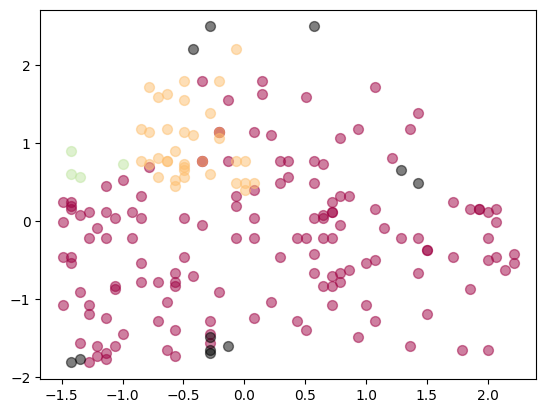

In [191]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)
    
    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 2], xy[:, 3], s = 50, c = [col], marker = u'o', alpha = 0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 2], xy[:, 3], s = 50, c = [col], marker = u'o', alpha = 0.5) 